In [1]:
!unzip /content/archive.zip

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading age_gender csv
imgs_data = pd.read_csv("age_gender.csv")
imgs_data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
# Shape of age_gender dataset
imgs_data.shape

(23705, 5)

In [7]:
# Size and datatypes of columns in dataset
imgs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [8]:
# checking for null values
imgs_data.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [9]:
imgs_data.isnull().any()

age          False
ethnicity    False
gender       False
img_name     False
pixels       False
dtype: bool

In [10]:
# Five number summary of age, ethnicity and gender
imgs_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,23705.0,33.300907,19.885708,1.0,23.0,29.0,45.0,116.0
ethnicity,23705.0,1.269226,1.345638,0.0,0.0,1.0,2.0,4.0
gender,23705.0,0.477283,0.499494,0.0,0.0,0.0,1.0,1.0


In [11]:
# Making pixel data into array with float datatype
# array is converted into datatype float since pixel values will converted into range of 0 to 1 which gives decimals
imgs_data['pixels_array'] =imgs_data['pixels'].apply(lambda x : np.array(x.split(),dtype="float32"))

In [12]:
# Converting pixel values between range 0 to 1
imgs_data['pixels_array'] = imgs_data['pixels_array'].apply(lambda x : x /255)

In [13]:
imgs_data.head()

,age,ethnicity,gender,img_name,pixels,pixels_array
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."


In [14]:
imgs_data['pixels_array']

0        [0.5058824, 0.5019608, 0.5019608, 0.49411765, ...
1        [0.6431373, 0.2901961, 0.43529412, 0.65882355,...
2        [0.2627451, 0.27450982, 0.2784314, 0.27450982,...
3        [0.75686276, 0.77254903, 0.7764706, 0.78431374...
4        [0.7921569, 0.8039216, 0.81960785, 0.8235294, ...
                               ...                        
23700    [0.49803922, 0.39215687, 0.36862746, 0.3176470...
23701    [0.09019608, 0.10980392, 0.1254902, 0.13725491...
23702    [0.23137255, 0.19607843, 0.14509805, 0.1568627...
23703    [0.1764706, 0.42352942, 0.47058824, 0.6117647,...
23704    [0.6117647, 0.6313726, 0.627451, 0.64705884, 0...
Name: pixels_array, Length: 23705, dtype: object

In [15]:
# Flipping the pixel array data to generate flipped images along y axis
for i,r in imgs_data.iterrows():
  # Flipping along axis 1 for 48x48 matrix
  a = np.fliplr(r[5].reshape(48,48))
  # Appending newly generated images to imgs_data
  imgs_data = imgs_data.append({'age': r[0], 'ethnicity': r[1], 'gender': r[2], 'img_name':'', 'pixels':'', 'pixels_array': a.reshape(48*48)}, ignore_index = True)

In [16]:
imgs_data['pixels_array']

0        [0.5058824, 0.5019608, 0.5019608, 0.49411765, ...
1        [0.6431373, 0.2901961, 0.43529412, 0.65882355,...
2        [0.2627451, 0.27450982, 0.2784314, 0.27450982,...
3        [0.75686276, 0.77254903, 0.7764706, 0.78431374...
4        [0.7921569, 0.8039216, 0.81960785, 0.8235294, ...
                               ...                        
47405    [0.39607844, 0.41568628, 0.43529412, 0.5019608...
47406    [0.60784316, 0.6313726, 0.61960787, 0.6313726,...
47407    [0.38431373, 0.44313726, 0.46666667, 0.5215686...
47408    [0.20784314, 0.14117648, 0.12156863, 0.1254902...
47409    [0.57254905, 0.56078434, 0.58431375, 0.5647059...
Name: pixels_array, Length: 47410, dtype: object

In [17]:
imgs_data['age']

0         1
1         1
2         1
3         1
4         1
         ..
47405    99
47406    99
47407    99
47408    99
47409    99
Name: age, Length: 47410, dtype: int64

In [18]:
imgs_data.shape

(47410, 6)

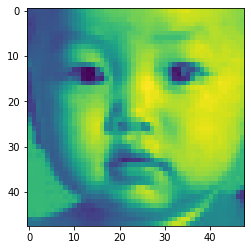

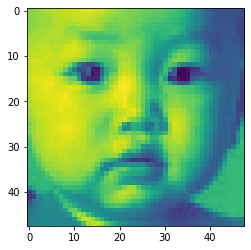

In [19]:
plt.imshow(imgs_data['pixels_array'][2].reshape(48,48))
plt.show()
plt.imshow(imgs_data['pixels_array'][23707].reshape(48,48))
plt.show()

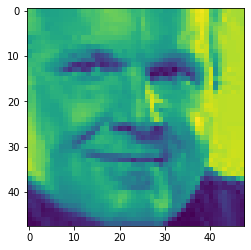

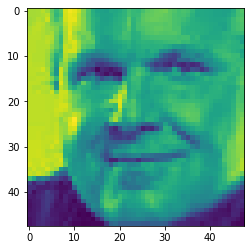

In [20]:
index1 = 20200
plt.imshow(imgs_data['pixels_array'][index1].reshape(48,48))
plt.show()
plt.imshow(imgs_data['pixels_array'][index1+23705].reshape(48,48)) #23705 is the size of initial data
plt.show()

In [21]:
# Converting array to array list
X = np.array(imgs_data['pixels_array'].tolist())
# Reshaping the pixel array
X = X.reshape(X.shape[0],48,48,1)

In [22]:
X.shape

(47410, 48, 48, 1)

### Data Visualization

Gender

Text(0.5, 1.0, 'Gender Count Visualization')

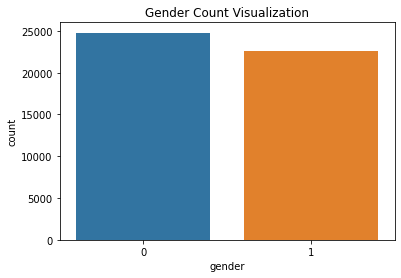

In [23]:
# Visualizing the count of gender
sns.countplot(imgs_data['gender']).set_title('Gender Count Visualization')

Age

Text(0.5, 1.0, 'Age Count Visualization')

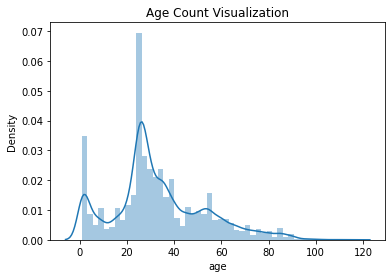

In [24]:
# Visualizing the Age distribution
sns.distplot(imgs_data['age']).set_title('Age Count Visualization')

Etnicity

Text(0.5, 1.0, 'Ethnicity Count Visualization')

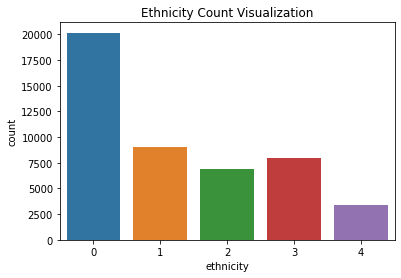

In [25]:
# Visualizing Ethnicity count in the data
sns.countplot(imgs_data['ethnicity']).set_title('Ethnicity Count Visualization')

#### Image Viewing

Children visualization

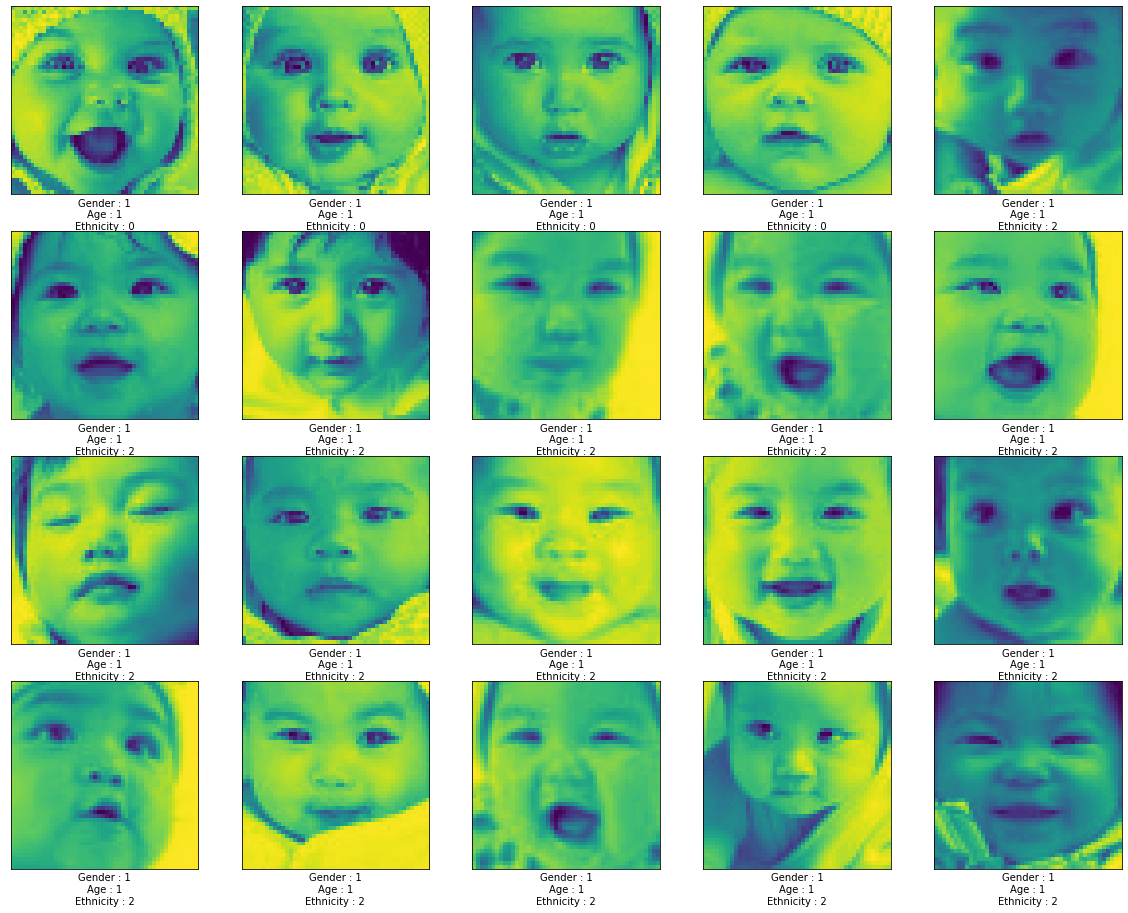

In [26]:
plt.figure(figsize=(20,20))

for i in range(1000,1020):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs_data['pixels_array'].iloc[i].reshape(48,48))
    plt.xlabel(
    "Gender : " +str(imgs_data['gender'].iloc[i]) +
    "\nAge : "+ str(imgs_data['age'].iloc[i]) +
    "\nEthnicity : " + str(imgs_data['ethnicity'].iloc[i])
    )
plt.show()

Random Visualization

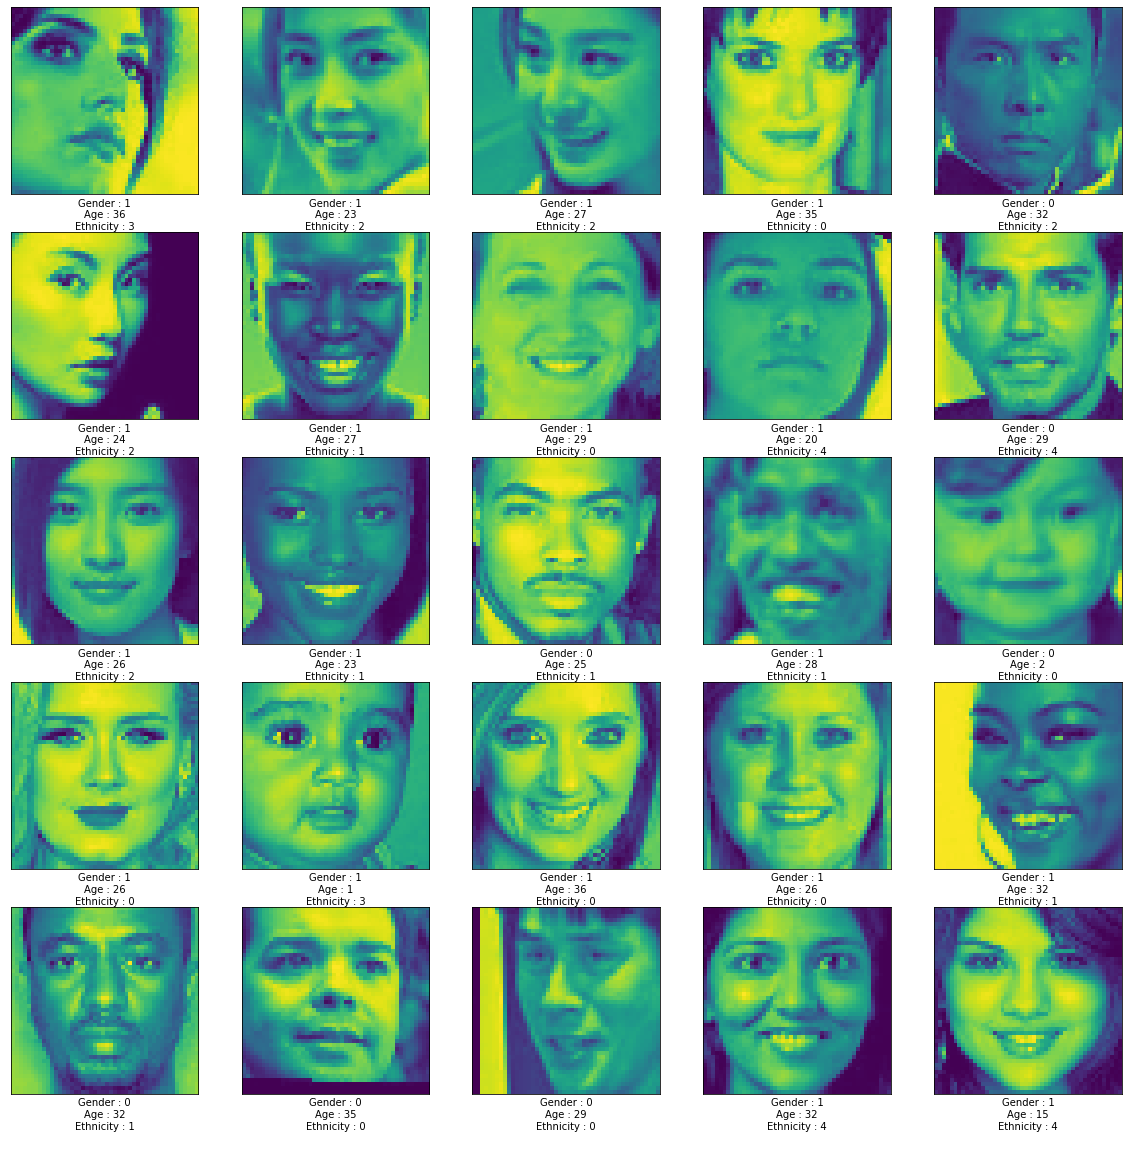

In [27]:
plt.figure(figsize=(20,20))

for i,a in zip(np.random.randint(0, 15500, 25),range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs_data['pixels_array'].iloc[i].reshape(48,48))
    plt.xlabel(
    "Gender : " +str(imgs_data['gender'].iloc[i]) +
    "\nAge : "+ str(imgs_data['age'].iloc[i]) +
    "\nEthnicity : " + str(imgs_data['ethnicity'].iloc[i]) + "\n"
    )
plt.show()


# **Splitting the dataset into training and testing**

**Import library**

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

In [29]:
# Storing data of age, gender and ethnicity columns in separate variables
age = imgs_data['age']
gender = imgs_data['gender']
ethnicity = imgs_data['ethnicity']

In [30]:
# Converting stored data into arrays
age_arr = np.array(age)
ethnicity_arr = np.array(ethnicity)
gender_arr = np.array(gender)

In [31]:
# test and train split of age, gender and ethnicity with train as 80% and test as 20% 
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, age, test_size=0.20, random_state=42)
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, gender, test_size=0.20, random_state=42)
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, ethnicity, test_size=0.20, random_state=42)

# **Model one Development**

In [32]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,MaxPooling2D,BatchNormalization,InputLayer
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Gender Prediction

In [33]:
# CNN model to predict gender
model_gender = Sequential([
    InputLayer((48,48,1)),
    Conv2D(32,(3,3),input_shape=(48,48,1),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(5)
    
])
# rmsprop optimizer, accuracy metric and loss SparseCategoricalCrossentropy is used
model_gender.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='rmsprop',metrics=['acc'])

In [34]:
# Fitting the CNN model for test and train split of gender 
history_gender =  model_gender.fit(X_train_gender,y_train_gender,epochs=10,validation_data=(X_test_gender, y_test_gender),batch_size=48)

Epoch 1/10
791/791 [==============================] - 14s 6ms/step - loss: 0.4325 - acc: 0.7995 - val_loss: 0.2957 - val_acc: 0.8654
Epoch 2/10
791/791 [==============================] - 5s 6ms/step - loss: 0.3050 - acc: 0.8659 - val_loss: 0.2641 - val_acc: 0.8834
Epoch 3/10
791/791 [==============================] - 5s 6ms/step - loss: 0.2746 - acc: 0.8843 - val_loss: 0.2971 - val_acc: 0.8641
Epoch 4/10
791/791 [==============================] - 5s 6ms/step - loss: 0.2557 - acc: 0.8947 - val_loss: 0.2423 - val_acc: 0.8955
Epoch 5/10
791/791 [==============================] - 5s 6ms/step - loss: 0.2434 - acc: 0.8996 - val_loss: 0.2565 - val_acc: 0.8896
Epoch 6/10
791/791 [==============================] - 5s 6ms/step - loss: 0.2349 - acc: 0.9029 - val_loss: 0.2486 - val_acc: 0.8961
Epoch 7/10
791/791 [==============================] - 5s 6ms/step - loss: 0.2306 - acc: 0.9062 - val_loss: 0.2496 - val_acc: 0.8954
Epoch 8/10
791/791 [==============================] - 5s 6ms/step - loss: 0

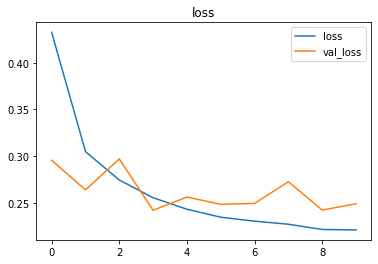

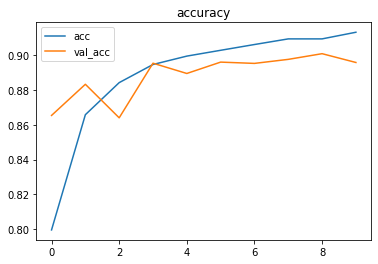

In [35]:
# Plotting loss and accuracy of the cnn gender model 
history_df = pd.DataFrame(history_gender.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['acc','val_acc']].plot(title='accuracy')

In [36]:
# Storing accuracy in a variable
model1_gender_acc = history_df['val_acc'][5]

Age prediction

In [37]:
# CNN model to predict age
model_age = Sequential([
    InputLayer((48,48,1)),
    Conv2D(32,(3,3),input_shape=(48,48,1),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(104,activation='relu')
    
])
# adam optimizer, accuracy metric and loss mean_squared_error is used
model_age.compile(loss='mean_squared_error',optimizer='adam',metrics=['acc'])

In [38]:
# Fitting the CNN model for test and train split of age
history_age = model_age.fit(X_train_age,y_train_age,epochs=10,validation_data=(X_test_age, y_test_age),batch_size=48)

Epoch 1/10
791/791 [==============================] - 7s 8ms/step - loss: 222.3398 - acc: 0.0086 - val_loss: 278.6687 - val_acc: 0.0089
Epoch 2/10
791/791 [==============================] - 6s 8ms/step - loss: 127.6587 - acc: 0.0087 - val_loss: 158.5244 - val_acc: 0.0055
Epoch 3/10
791/791 [==============================] - 6s 8ms/step - loss: 111.8215 - acc: 0.0083 - val_loss: 251.1703 - val_acc: 0.0039
Epoch 4/10
791/791 [==============================] - 6s 7ms/step - loss: 102.7196 - acc: 0.0080 - val_loss: 204.6788 - val_acc: 0.0064
Epoch 5/10
791/791 [==============================] - 6s 7ms/step - loss: 96.7094 - acc: 0.0081 - val_loss: 628.7019 - val_acc: 0.0024
Epoch 6/10
791/791 [==============================] - 6s 7ms/step - loss: 94.6053 - acc: 0.0100 - val_loss: 136.8780 - val_acc: 0.0104
Epoch 7/10
791/791 [==============================] - 6s 8ms/step - loss: 86.0109 - acc: 0.0107 - val_loss: 117.2964 - val_acc: 0.0110
Epoch 8/10
791/791 [==============================]

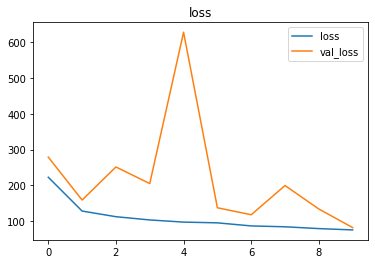

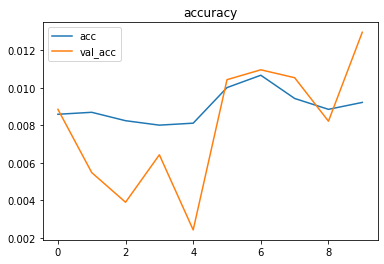

In [39]:
# Plotting loss and accuracy of the cnn age model 
history_df = pd.DataFrame(history_age.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['acc','val_acc']].plot(title='accuracy')

In [40]:
# Storing accuracy in a variable
model1_age_acc = history_df['val_acc'][5]

Ethnicity Prediction

In [41]:
# CNN model to predict ethnicity
model_ethnicity = Sequential([
    InputLayer((48,48,1)),
    Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
    
])
# sgd optimizer, accuracy metric and loss binary_crossentropy is used
model_ethnicity.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])

In [42]:
# Fitting the CNN model for test and train split of ethnicity
history_ethnicity =  model_ethnicity.fit(X_train_ethnicity,y_train_ethnicity,epochs=10,validation_split=0.1,batch_size=48)

Epoch 1/10
712/712 [==============================] - 5s 7ms/step - loss: nan - acc: 0.4149 - val_loss: nan - val_acc: 0.4115
Epoch 2/10
712/712 [==============================] - 4s 6ms/step - loss: nan - acc: 0.4249 - val_loss: nan - val_acc: 0.4115
Epoch 3/10
712/712 [==============================] - 5s 6ms/step - loss: nan - acc: 0.4249 - val_loss: nan - val_acc: 0.4115
Epoch 4/10
712/712 [==============================] - 5s 6ms/step - loss: nan - acc: 0.4249 - val_loss: nan - val_acc: 0.4115
Epoch 5/10
712/712 [==============================] - 5s 7ms/step - loss: nan - acc: 0.4249 - val_loss: nan - val_acc: 0.4115
Epoch 6/10
712/712 [==============================] - 5s 7ms/step - loss: nan - acc: 0.4249 - val_loss: nan - val_acc: 0.4115
Epoch 7/10
712/712 [==============================] - 5s 6ms/step - loss: nan - acc: 0.4249 - val_loss: nan - val_acc: 0.4115
Epoch 8/10
712/712 [==============================] - 5s 6ms/step - loss: nan - acc: 0.4249 - val_loss: nan - val_acc:

In [43]:
# Storing accuracy in a variable
model1_ethnicity_acc = history_df['val_acc'][5]

# **Model two Development**

In [44]:
#Dividing the age into 5 groups 
conditions = [
    (imgs_data['age'] <=15),
    (imgs_data['age'] <=30),
    (imgs_data['age'] <=45),
    (imgs_data['age'] <=80),
    (imgs_data['age'] >80)
    ]
age_groups = {0:'0-15',1:'16-30',2:'31-45',3:'46-80',4:'80+'}
choices = [0,1,2,3,4]
imgs_data['age_group'] = np.select(conditions,choices, default=0)

In [45]:
# Storing data of age, gender and ethnicity columns in separate variables
age = imgs_data['age_group']
gender = imgs_data['gender']
ethnicity = imgs_data['ethnicity']

In [46]:
# Converting stored data into arrays
age_arr = np.array(age)
ethnicity_arr = np.array(ethnicity)
gender_arr = np.array(gender)

In [47]:
# Converting the arrays into categories
age = to_categorical(age_arr, num_classes = 5)
gender = to_categorical(gender, num_classes = 2)
ethnicity = to_categorical(ethnicity_arr, num_classes = 5)
print(age, gender, ethnicity)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [48]:
# test and train split of age, gender and ethnicity with train as 80% and test as 20% 
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, age, test_size=0.20, random_state=42)
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, gender, test_size=0.20, random_state=42)
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, ethnicity, test_size=0.20, random_state=42)

In [49]:
#assigning batch size
batch_size = 64

**CNN Model**

In [50]:
# Creating a CNN model that can be used for all age, gender and ethnicity
def model_dev(num_classes, activation, loss):
    model = Sequential()
    # input shape of images are 48x48 pixels and same padding to produce same output size as input 
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
    # Batch normalization between layers
    model.add(BatchNormalization())
    # Max pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    # Nullifying 20% of the nodes to avoid overfitting
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(num_classes, activation=activation))
    
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model
# Early stopping of epochs if desired improvement is not attained in the metrics
# Compiling will be stopped after 5 epochs of no improvement or improvement less than 0.001
early_stopping = EarlyStopping(patience=10, 
                               min_delta=0.001,
                               restore_best_weights=True)

# Reducing the learning rate by factor of 0.5 based on value accuracy after no improvement for 2 epochs
# lower boundry for learning rate is set to 0.00001

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                           patience = 2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr = 0.00001)

Gender Prediction

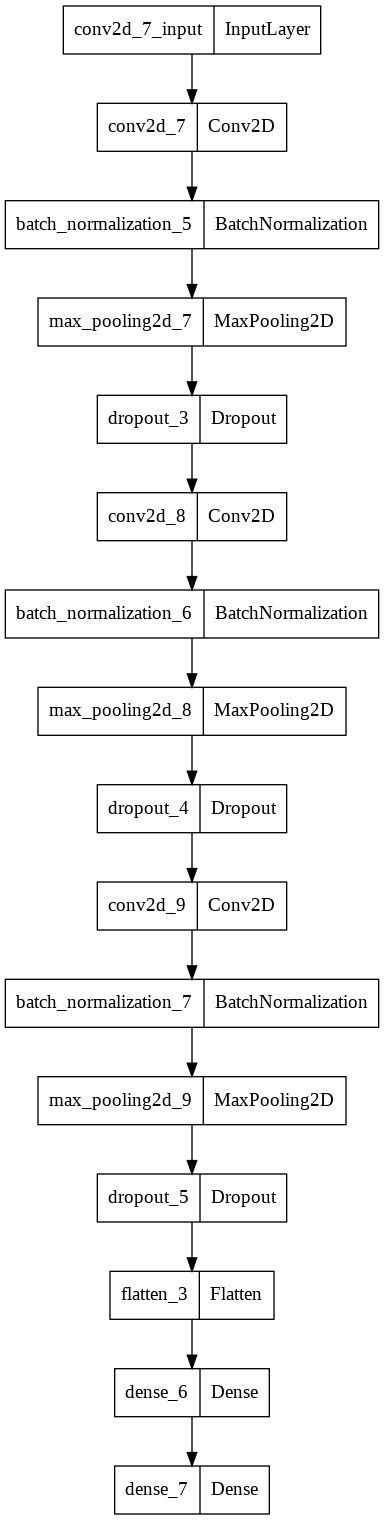

In [51]:
# Using CNN model to train gender with 2 categories with softmax as activation and categorical_crossentropy as loss function
model_gender = model_dev(2,"softmax",'categorical_crossentropy')
# Plotting the CNN model for gender
plot_model(model_gender)

In [52]:
# Fitting the CNN model for test and train split of gender with early stopping and learning rate reduction functions
history_gender =  model_gender.fit(X_train_gender,y_train_gender,epochs=10,
                                   validation_data=(X_test_gender, y_test_gender),batch_size=batch_size,
                                   steps_per_epoch= X_train_gender.shape[0] // batch_size, 
                                   callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/10
589/592 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.8025

592/592 [==============================] - 7s 10ms/step - loss: 0.4344 - accuracy: 0.8028 - val_loss: 0.3153 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 2/10
590/592 [============================>.] - ETA: 0s - loss: 0.2905 - accuracy: 0.8706

592/592 [==============================] - 6s 10ms/step - loss: 0.2903 - accuracy: 0.8708 - val_loss: 0.2694 - val_accuracy: 0.8777 - lr: 0.0010
Epoch 3/10
589/592 [============================>.] - ETA: 0s - loss: 0.2570 - accuracy: 0.8869

592/592 [==============================] - 6s 10ms/step - loss: 0.2569 - accuracy: 0.8871 - val_loss: 0.2703 - val_accuracy: 0.8770 - lr: 0.0010
Epoch 4/10
591/592 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.8988

592/592 [==============================] - 6s 10ms/step - loss: 0.2381 - accuracy: 0.8988 - val_loss: 0.2425 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 5/10
590/592 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9052

592/592 [==============================] - 6s 10ms/step - loss: 0.2207 - accuracy: 0.9052 - val_loss: 0.2332 - val_accuracy: 0.8991 - lr: 0.0010
Epoch 6/10
589/592 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9106

592/592 [==============================] - 6s 10ms/step - loss: 0.2079 - accuracy: 0.9106 - val_loss: 0.2294 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 7/10
590/592 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9182

592/592 [==============================] - 6s 10ms/step - loss: 0.1957 - accuracy: 0.9180 - val_loss: 0.2204 - val_accuracy: 0.9045 - lr: 0.0010
Epoch 8/10
592/592 [==============================] - ETA: 0s - loss: 0.1803 - accuracy: 0.9257

592/592 [==============================] - 6s 10ms/step - loss: 0.1803 - accuracy: 0.9257 - val_loss: 0.2437 - val_accuracy: 0.8965 - lr: 0.0010
Epoch 9/10
587/592 [============================>.] - ETA: 0s - loss: 0.1723 - accuracy: 0.9298

592/592 [==============================] - 6s 10ms/step - loss: 0.1723 - accuracy: 0.9298 - val_loss: 0.2182 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 10/10
591/592 [============================>.] - ETA: 0s - loss: 0.1562 - accuracy: 0.9367

592/592 [==============================] - 6s 10ms/step - loss: 0.1564 - accuracy: 0.9366 - val_loss: 0.2337 - val_accuracy: 0.9039 - lr: 0.0010


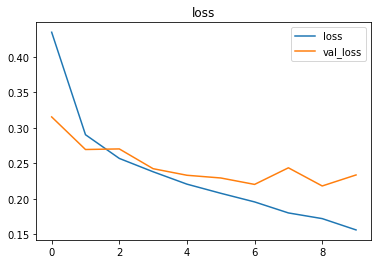

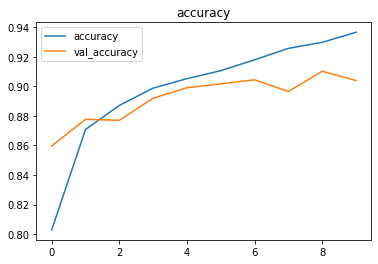

In [53]:
# Plotting loss and accuracy of the cnn gender model 
history_df = pd.DataFrame(history_gender.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['accuracy','val_accuracy']].plot(title='accuracy')

In [54]:
# evaluating CNN gender model performance on test set
loss,model2_gender_acc = model_gender.evaluate(X_test_gender,y_test_gender)
print("Accuracy: ", model2_gender_acc)

297/297 [==============================] - 1s 4ms/step - loss: 0.2337 - accuracy: 0.9039
Accuracy:  0.9039232134819031


Age Prediction

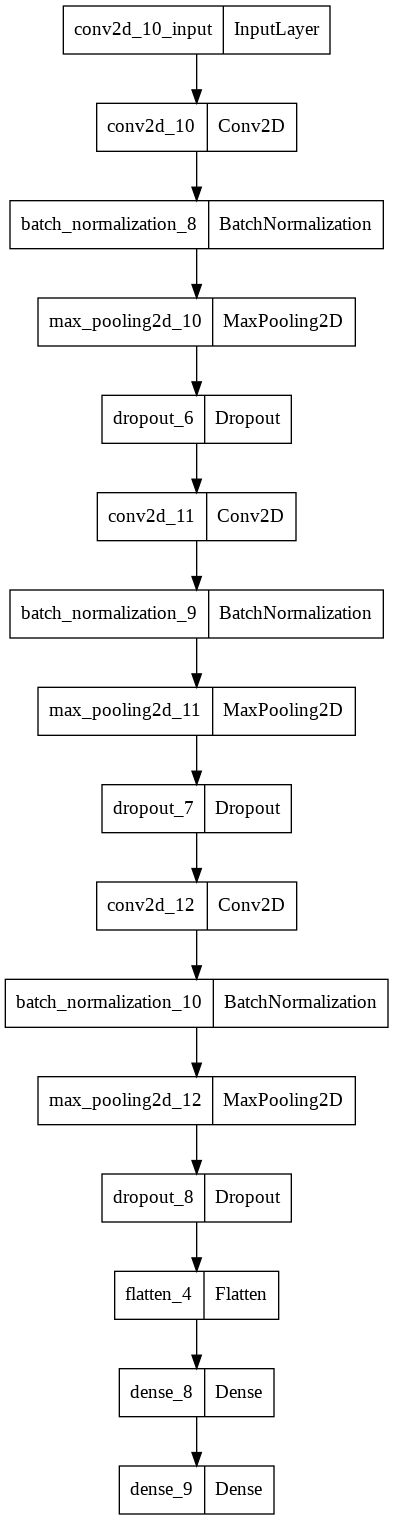

In [55]:
# Using CNN model to train age with 5 categories with softmax as activation and categorical_crossentropy as loss function
model_age = model_dev(5,"softmax",'categorical_crossentropy')
# Plotting the CNN model for age
plot_model(model_age)

In [56]:
# Fitting the CNN model for test and train split of age with early stopping and learning rate reduction functions
history_age = model_age.fit(X_train_age, y_train_age, batch_size=batch_size,
                              epochs = 8, validation_data = (X_test_age,y_test_age), 
                            steps_per_epoch= X_train_age.shape[0] // batch_size, 
                            callbacks= [early_stopping, 
                            learning_rate_reduction])

Epoch 1/8
590/592 [============================>.] - ETA: 0s - loss: 0.9777 - accuracy: 0.5986

592/592 [==============================] - 7s 10ms/step - loss: 0.9772 - accuracy: 0.5989 - val_loss: 1.2545 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 2/8
592/592 [==============================] - ETA: 0s - loss: 0.7642 - accuracy: 0.6741

592/592 [==============================] - 6s 10ms/step - loss: 0.7642 - accuracy: 0.6741 - val_loss: 0.7346 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 3/8
588/592 [============================>.] - ETA: 0s - loss: 0.7135 - accuracy: 0.6922

592/592 [==============================] - 6s 10ms/step - loss: 0.7141 - accuracy: 0.6918 - val_loss: 0.6912 - val_accuracy: 0.7018 - lr: 0.0010
Epoch 4/8
588/592 [============================>.] - ETA: 0s - loss: 0.6775 - accuracy: 0.7059

592/592 [==============================] - 6s 10ms/step - loss: 0.6779 - accuracy: 0.7056 - val_loss: 1.3976 - val_accuracy: 0.5578 - lr: 0.0010
Epoch 5/8
587/592 [============================>.] - ETA: 0s - loss: 0.6526 - accuracy: 0.7167

592/592 [==============================] - 6s 10ms/step - loss: 0.6522 - accuracy: 0.7168 - val_loss: 0.7448 - val_accuracy: 0.6841 - lr: 0.0010
Epoch 6/8
588/592 [============================>.] - ETA: 0s - loss: 0.6274 - accuracy: 0.7289

592/592 [==============================] - 6s 10ms/step - loss: 0.6273 - accuracy: 0.7288 - val_loss: 0.7953 - val_accuracy: 0.6637 - lr: 0.0010
Epoch 7/8
588/592 [============================>.] - ETA: 0s - loss: 0.6063 - accuracy: 0.7370

592/592 [==============================] - 6s 10ms/step - loss: 0.6061 - accuracy: 0.7373 - val_loss: 0.6659 - val_accuracy: 0.7195 - lr: 0.0010
Epoch 8/8
592/592 [==============================] - ETA: 0s - loss: 0.5886 - accuracy: 0.7479

592/592 [==============================] - 6s 10ms/step - loss: 0.5886 - accuracy: 0.7479 - val_loss: 0.8327 - val_accuracy: 0.6751 - lr: 0.0010


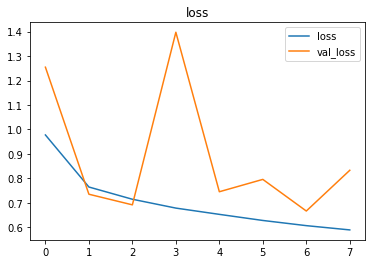

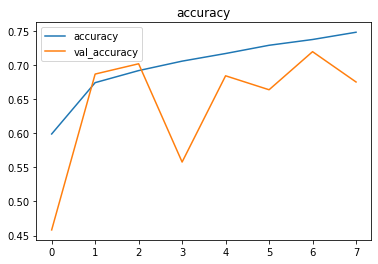

In [57]:
# Plotting loss and accuracy of the CNN age model 
history_df = pd.DataFrame(history_age.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['accuracy','val_accuracy']].plot(title='accuracy')

In [58]:
# evaluating CNN age model performance on test set
model2_age_acc = history_df['val_accuracy'][4]

Etnicity Prediction

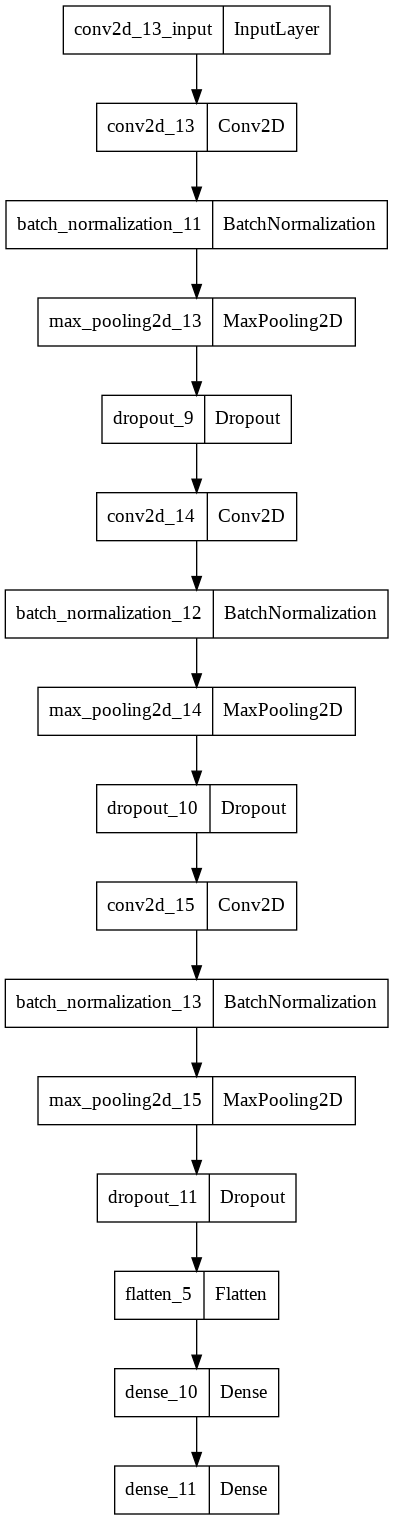

In [59]:
# Using CNN model to train ethnicity with 5 categories with softmax as activation and categorical_crossentropy as loss function
model_ethnicity = model_dev(5,"softmax",'categorical_crossentropy')
# Plotting the CNN model for ethnicity
plot_model(model_ethnicity)

In [60]:
# Fitting the CNN model for test and train split of ethnicity with early stopping and learning rate reduction functions
history_ethnicity =  model_ethnicity.fit(X_train_ethnicity,y_train_ethnicity,epochs=8,batch_size=batch_size,
                                         validation_data = (X_test_ethnicity,y_test_ethnicity), 
                            steps_per_epoch= X_train_ethnicity.shape[0] // batch_size, 
                            callbacks= [early_stopping, 
                            learning_rate_reduction])

Epoch 1/8
592/592 [==============================] - ETA: 0s - loss: 1.0003 - accuracy: 0.6462

592/592 [==============================] - 7s 11ms/step - loss: 1.0003 - accuracy: 0.6462 - val_loss: 0.8698 - val_accuracy: 0.6929 - lr: 0.0010
Epoch 2/8
589/592 [============================>.] - ETA: 0s - loss: 0.7129 - accuracy: 0.7474

592/592 [==============================] - 7s 11ms/step - loss: 0.7122 - accuracy: 0.7476 - val_loss: 0.7120 - val_accuracy: 0.7488 - lr: 0.0010
Epoch 3/8
590/592 [============================>.] - ETA: 0s - loss: 0.6426 - accuracy: 0.7711

592/592 [==============================] - 6s 10ms/step - loss: 0.6429 - accuracy: 0.7710 - val_loss: 0.7056 - val_accuracy: 0.7509 - lr: 0.0010
Epoch 4/8
590/592 [============================>.] - ETA: 0s - loss: 0.5937 - accuracy: 0.7892

592/592 [==============================] - 6s 10ms/step - loss: 0.5932 - accuracy: 0.7894 - val_loss: 0.6556 - val_accuracy: 0.7742 - lr: 0.0010
Epoch 5/8
588/592 [============================>.] - ETA: 0s - loss: 0.5585 - accuracy: 0.8034

592/592 [==============================] - 6s 10ms/step - loss: 0.5583 - accuracy: 0.8035 - val_loss: 0.6239 - val_accuracy: 0.7830 - lr: 0.0010
Epoch 6/8
590/592 [============================>.] - ETA: 0s - loss: 0.5215 - accuracy: 0.8141

592/592 [==============================] - 6s 10ms/step - loss: 0.5211 - accuracy: 0.8143 - val_loss: 0.6992 - val_accuracy: 0.7601 - lr: 0.0010
Epoch 7/8
591/592 [============================>.] - ETA: 0s - loss: 0.4899 - accuracy: 0.8262

592/592 [==============================] - 6s 10ms/step - loss: 0.4897 - accuracy: 0.8263 - val_loss: 0.5718 - val_accuracy: 0.8031 - lr: 0.0010
Epoch 8/8
591/592 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.8380

592/592 [==============================] - 6s 10ms/step - loss: 0.4626 - accuracy: 0.8380 - val_loss: 0.6117 - val_accuracy: 0.7939 - lr: 0.0010


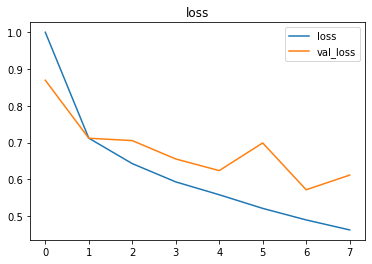

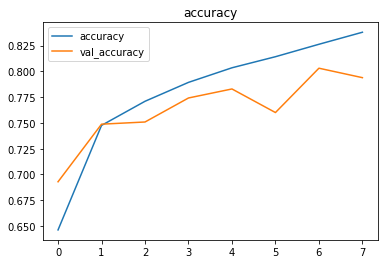

In [61]:
# Plotting loss and accuracy of the CNN ethnicity model
history_df = pd.DataFrame(history_ethnicity.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['accuracy','val_accuracy']].plot(title='accuracy')

In [62]:
# evaluating CNN ethnicity model performance on test set
model2_ethnicity_acc = history_df['val_accuracy'][4]

# **Predicting an image's age gender and ethnicity using CNN Model**

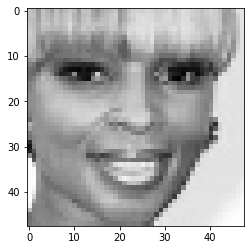

In [95]:
# getting image from data, storing it in img variable and plotting it
index = 20240
img = imgs_data['pixels_array'].iloc[index].reshape(48,48)
plt.imshow(img, cmap='Greys_r')
plt.show()

In [96]:
# Displaying the real data of the img
print("Real data")
print("Age: ", imgs_data['age'].iloc[index])
genders = ['male','female']
print("Gender: ", genders[imgs_data['gender'].iloc[index]])
print("Ethnicity: ", imgs_data['ethnicity'].iloc[index])

Real data
Age:  58
Gender:  female
Ethnicity:  1


In [97]:
# Function for predicting the age, ethnicity and gender of the img using the CNN model
def predict(model_,img):
    pred = np.argmax(model_.predict(img),axis=1)
    return pred

In [98]:
# reshaping image to fit into model prediction
img = img.reshape(-1,48,48,1)
age = predict(model_age,img)[0]
# To display predicted gender instead of numbericals
genders = ['male','female']
gender = genders[predict(model_gender,img)[0]]
eth = predict(model_ethnicity,img)[0]
print("Predicted")
age,gender,eth
print("Age: ", age_groups[age], ", Gender: ", gender, ", Ethnicity: ", eth)

1/1 [==============================] - 0s 16ms/step
Predicted
Age:  46-80 , Gender:  female , Ethnicity:  1


# **Model three Development**

RNN Model

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# **Age Prediction**

In [68]:
# RNN model for age with input shape of  48, 48
model_rnn_age = Sequential()
model_rnn_age.add(LSTM(128, input_shape=(X_train_age.shape[1:3]), activation='relu', return_sequences=True))
model_rnn_age.add(Dropout(0.2))

model_rnn_age.add(Flatten(input_shape=(X_train_age.shape[1:3])))
model_rnn_age.add(Dense(128, activation='relu'))

model_rnn_age.add(Dense(5, activation='softmax'))

In [69]:
# Choosing Adam optimizer with learning rate 0.001 with learning rate decay of 10^-6 with each epoch
opt_rnn_age = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
# Metrics used for compile are MSE, Adam and accuracy
model_rnn_age.compile(
    loss='mean_squared_error',
    optimizer=opt_rnn_age,
    metrics=['accuracy'],
)

In [70]:
# Fitting the RNN age model on train set with 10 epochs
model_rnn_age.fit(X_train_age,
          y_train_age,
          epochs=5,
          validation_data=(X_test_age, y_test_age))

Epoch 1/5
1186/1186 [==============================] - 126s 105ms/step - loss: 0.1160 - accuracy: 0.5416 - val_loss: 0.1089 - val_accuracy: 0.5749
Epoch 2/5
1186/1186 [==============================] - 117s 99ms/step - loss: 0.1041 - accuracy: 0.5986 - val_loss: 0.0981 - val_accuracy: 0.6220
Epoch 3/5
1186/1186 [==============================] - 117s 99ms/step - loss: 0.0976 - accuracy: 0.6275 - val_loss: 0.0949 - val_accuracy: 0.6355
Epoch 4/5
1186/1186 [==============================] - 118s 99ms/step - loss: 0.0934 - accuracy: 0.6437 - val_loss: 0.0910 - val_accuracy: 0.6592
Epoch 5/5
1186/1186 [==============================] - 119s 100ms/step - loss: 0.0897 - accuracy: 0.6574 - val_loss: 0.0888 - val_accuracy: 0.6601


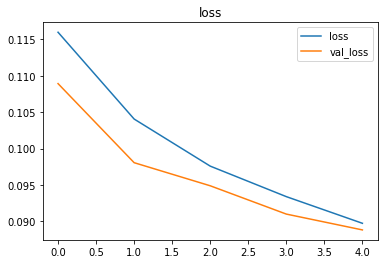

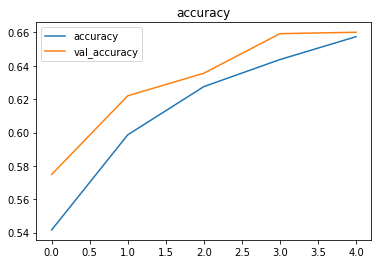

In [71]:
# Plotting the loss and accuracy for RNN age model
history_df = pd.DataFrame(model_rnn_age.history.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['accuracy','val_accuracy']].plot(title='accuracy')

In [72]:
#Storing accuracy in a variable
model3_age_acc = history_df['val_accuracy'][4]

# **Gender Prediction**

In [73]:
# RNN model for gender with input shape of  48, 48
model_rnn_gender = Sequential()
model_rnn_gender.add(LSTM(128, input_shape=(X_train_gender.shape[1:3]), activation='relu', return_sequences=True))
model_rnn_gender.add(Dropout(0.2))

model_rnn_gender.add(Flatten(input_shape=(X_train_gender.shape[1:3])))
model_rnn_gender.add(Dense(128, activation='relu'))

model_rnn_gender.add(Dense(2, activation='softmax'))

In [74]:
# Choosing Adam optimizer with learning rate 0.001 with learning rate decay of 10^-6 with each epoch
opt_rnn_gender = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Metrics used for compile are categorical_crossentropy, Adam and accuracy
model_rnn_gender.compile(
    loss='categorical_crossentropy',
    optimizer=opt_rnn_gender,
    metrics=['accuracy'],
)

In [75]:
# Fitting the RNN gender model on train set with 10 epochs
model_rnn_gender.fit(X_train_gender,
          y_train_gender,
          epochs=5,
          validation_data=(X_test_gender, y_test_gender))

Epoch 1/5
1186/1186 [==============================] - 120s 100ms/step - loss: 0.4482 - accuracy: 0.7824 - val_loss: 0.3526 - val_accuracy: 0.8383
Epoch 2/5
1186/1186 [==============================] - 113s 95ms/step - loss: 0.3474 - accuracy: 0.8424 - val_loss: 0.3275 - val_accuracy: 0.8494
Epoch 3/5
1186/1186 [==============================] - 117s 99ms/step - loss: 0.3214 - accuracy: 0.8549 - val_loss: 0.3166 - val_accuracy: 0.8557
Epoch 4/5
1186/1186 [==============================] - 115s 97ms/step - loss: 0.2998 - accuracy: 0.8648 - val_loss: 0.2884 - val_accuracy: 0.8674
Epoch 5/5
1186/1186 [==============================] - 115s 97ms/step - loss: 0.2849 - accuracy: 0.8731 - val_loss: 0.2826 - val_accuracy: 0.8706


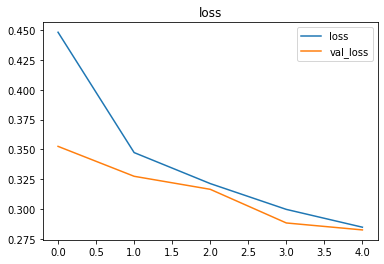

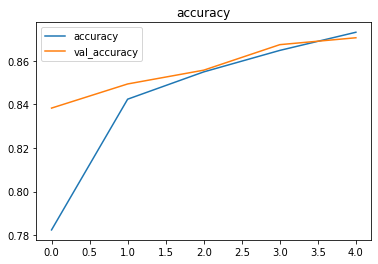

In [76]:
# Plotting the loss and accuracy for RNN gender model
history_df = pd.DataFrame(model_rnn_gender.history.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['accuracy','val_accuracy']].plot(title='accuracy')

In [77]:
#Storing accuracy in a variable 
model3_gender_acc = history_df['val_accuracy'][4]

# **Ethnicity Prediction**

In [78]:
# RNN model for gender with input shape of  48, 48
model_rnn_ethnicity = Sequential()
model_rnn_ethnicity.add(LSTM(128, input_shape=(X_train_ethnicity.shape[1:3]), activation='relu', return_sequences=True))
model_rnn_ethnicity.add(Dropout(0.2))

model_rnn_ethnicity.add(Flatten(input_shape=(X_train_ethnicity.shape[1:3])))
model_rnn_ethnicity.add(Dense(128, activation='relu'))

model_rnn_ethnicity.add(Dense(5, activation='softmax'))

In [79]:
# Choosing Adam optimizer with learning rate 0.001 with learning rate decay of 10^-6 with each epoch
opt_rnn_ethnicity = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Metrics used for compile are categorical_crossentropy, Adam and accuracy
model_rnn_ethnicity.compile(
    loss='categorical_crossentropy',
    optimizer=opt_rnn_ethnicity,
    metrics=['accuracy'],
)

In [80]:
# Fitting the RNN ethnicity model on train set with 10 epochs
model_rnn_ethnicity.fit(X_train_ethnicity,
          y_train_ethnicity,
          epochs=5,
          validation_data=(X_test_ethnicity, y_test_ethnicity))

Epoch 1/5
1186/1186 [==============================] - 116s 97ms/step - loss: 1.0642 - accuracy: 0.5994 - val_loss: 0.9068 - val_accuracy: 0.6720
Epoch 2/5
1186/1186 [==============================] - 115s 97ms/step - loss: 0.8515 - accuracy: 0.6928 - val_loss: 0.8212 - val_accuracy: 0.7081
Epoch 3/5
1186/1186 [==============================] - 116s 98ms/step - loss: 0.7761 - accuracy: 0.7227 - val_loss: 0.7597 - val_accuracy: 0.7328
Epoch 4/5
1186/1186 [==============================] - 116s 98ms/step - loss: 0.7235 - accuracy: 0.7441 - val_loss: 0.7092 - val_accuracy: 0.7518
Epoch 5/5
1186/1186 [==============================] - 118s 99ms/step - loss: 0.6884 - accuracy: 0.7557 - val_loss: 0.6746 - val_accuracy: 0.7607


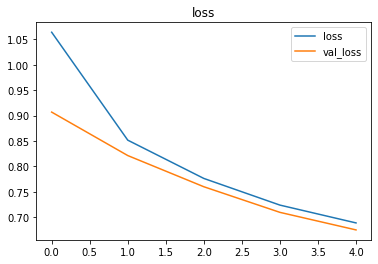

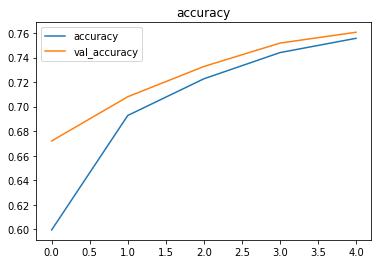

In [81]:
# Plotting the loss and accuracy for RNN ethnicity model
history_df = pd.DataFrame(model_rnn_ethnicity.history.history)
history_df[['loss','val_loss']].plot(title='loss')
history_df[['accuracy','val_accuracy']].plot(title='accuracy')

In [82]:
# evaluating RNN ethnicity model performance on test set
model3_ethnicity_acc = history_df['val_accuracy'][4]

# **Predicting an image's age gender and ethnicity using RNN Model**

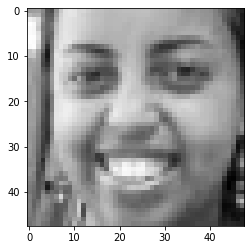

In [83]:
# getting image from data, storing it in img variable and plotting it
index = 6548
img = imgs_data['pixels_array'].iloc[index].reshape(48,48)

plt.imshow(img, cmap='Greys_r')
plt.show()

In [84]:
def predict_rnn(model_,img):
    pred_ = np.argmax(model_.predict(img),axis=1)
    return pred_

In [85]:
# Displaying the real data of img
print("Actual data")
print("Age: ", imgs_data['age'].iloc[index])
genders = ['male','female']
print("Gender: ", genders[imgs_data['gender'].iloc[index]])
print("Ethnicity: ", imgs_data['ethnicity'].iloc[index])
#predicting the image age, gender and ethnicity using RNN model
# Reshaping image to fit into model
img = img.reshape(-1,48,48,1)
age = age_groups[predict_rnn(model_rnn_age,img)[0]]
genders = ['male','female']
gender = genders[predict_rnn(model_rnn_gender,img)[0]]
eth = predict_rnn(model_rnn_ethnicity,img)[0]
# Displaying predicted data of img
print("Predicted data")
print("Age: ", age)
print("Gender: ", gender)
print("Ethnicity: ", eth)

Actual data
Age:  26
Gender:  female
Ethnicity:  1
1/1 [==============================] - 0s 166ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 173ms/step
Predicted data
Age:  16-30
Gender:  female
Ethnicity:  1


# **Accuracy Scores for the Models**

CNN Model

In [86]:
loss,acc_age = model_age.evaluate(X_test_age,y_test_age)
print("Age Accuracy: ", acc_age)
loss,acc_gender = model_gender.evaluate(X_test_gender,y_test_gender)
print("Gender Accuracy: ", acc_gender)
loss,acc_eth = model_ethnicity.evaluate(X_test_ethnicity,y_test_ethnicity)
print("Ethnicity Accuracy: ", acc_eth)

297/297 [==============================] - 1s 4ms/step - loss: 0.8327 - accuracy: 0.6751
Age Accuracy:  0.6750685572624207
297/297 [==============================] - 1s 4ms/step - loss: 0.2337 - accuracy: 0.9039
Gender Accuracy:  0.9039232134819031
297/297 [==============================] - 1s 4ms/step - loss: 0.6117 - accuracy: 0.7939
Ethnicity Accuracy:  0.7939253449440002


RNN Model

In [87]:
loss,acc_rnn_age = model_rnn_age.evaluate(X_test_age,y_test_age)
print("Age Accuracy: ", acc_rnn_age)
loss,acc_rnn_gender = model_rnn_gender.evaluate(X_test_gender,y_test_gender)
print("Gender Accuracy: ", acc_rnn_gender)
loss,acc_rnn_eth = model_rnn_ethnicity.evaluate(X_test_ethnicity,y_test_ethnicity)
print("Ethnicity Accuracy: ", acc_rnn_eth)

297/297 [==============================] - 3s 11ms/step - loss: 0.0888 - accuracy: 0.6601
Age Accuracy:  0.660092830657959
297/297 [==============================] - 3s 12ms/step - loss: 0.2826 - accuracy: 0.8706
Gender Accuracy:  0.8705969452857971
297/297 [==============================] - 3s 11ms/step - loss: 0.6746 - accuracy: 0.7607
Ethnicity Accuracy:  0.760704517364502


# **Summary**

In [88]:
#table to show the accuracy of all models
from tabulate import tabulate

dict = {'Model':['Model1', 'Model2', 'Model3'],
        'Gender':[model1_gender_acc ,model2_gender_acc,model3_gender_acc],
        'Age':[model1_age_acc ,model2_age_acc ,model3_age_acc],
        'Ethnicity':[model1_ethnicity_acc ,model2_ethnicity_acc ,model3_ethnicity_acc]}
df = pd.DataFrame(dict)


In [89]:
df.style.set_properties(
    **{
        'color' : 'black !important',
        'border' : '1px black solid !important'
    }
). format ({
     'Gender' : '{:,.2%}'.format,
     'Age' : '{:,.2%}'.format,
     'Ethnicity' : '{:,.2%}'.format
})

,Model,Gender,Age,Ethnicity
0,Model1,89.61%,1.04%,1.04%
1,Model2,90.39%,68.41%,78.30%
2,Model3,87.06%,66.01%,76.07%


### User Input Images

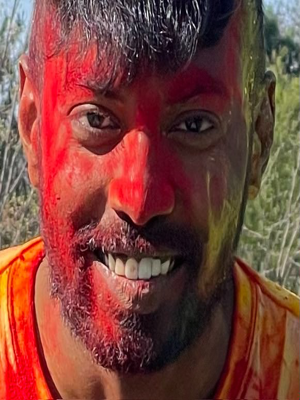

In [109]:
image2 = Image.open('img3.jpeg')
image2 = image2.resize((300, 400))
image2

array([[174., 176., 155., ..., 163., 165., 159.],
       [172., 168., 160., ..., 166., 157., 156.],
       [152., 161., 162., ..., 168., 169., 155.],
       ...,
       [252., 245., 245., ..., 129., 123., 119.],
       [253., 244., 246., ..., 126., 120., 118.],
       [253., 249., 245., ..., 126., 117., 116.]])

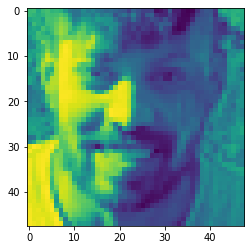

In [110]:
image2 = image2.resize((48, 48))
img2 = np.array(list(image2.getdata(band=0)), float)
img2.shape = (image2.size[1], image2.size[0])
plt.imshow(img2)

img2

In [111]:
userimage2 = asarray(img2)
userimage2.size

2304

In [112]:
userimage2 = userimage2.reshape(-1,48,48,1)

In [113]:
# reshaping image to fit into model prediction
img = img.reshape(-1,48,48,1)
age = predict(model_age,userimage2)[0]
# To display predicted gender instead of numbericals
genders = ['male','female']
gender = genders[predict(model_gender,userimage2)[0]]
eth = predict(model_ethnicity,userimage2)[0]
print("Predicted")
age,gender,eth
print("Age: ", age_groups[age], ", Gender: ", gender, ", Ethnicity: ", eth)

1/1 [==============================] - 0s 19ms/step
Predicted
Age:  16-30 , Gender:  male , Ethnicity:  0
